In [178]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [179]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [180]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder


In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [182]:
data = pd.read_csv("PAMAP_features.csv")

In [183]:
data

,Unnamed: 0,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [184]:
activity_id = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

In [185]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773 entries, 0 to 11772
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11773 non-null  int64  
 1   sub_id            11773 non-null  int64  
 2   activity_id       11773 non-null  int64  
 3   act_level         11773 non-null  object 
 4   hr_mean           11773 non-null  float64
 5   hr_mean_normal    11773 non-null  float64
 6   hr_std            11773 non-null  float64
 7   hr_std_normal     11773 non-null  float64
 8   hand_tmp_mean     11773 non-null  float64
 9   hand_tmp_std      11773 non-null  float64
 10  hand_acc_x_mean   11773 non-null  float64
 11  hand_acc_x_std    11773 non-null  float64
 12  hand_acc_y_mean   11773 non-null  float64
 13  hand_acc_y_std    11773 non-null  float64
 14  hand_acc_z_mean   11773 non-null  float64
 15  hand_acc_z_std    11773 non-null  float64
 16  hand_gyr_x_mean   11773 non-null  float6

In [186]:
df = data.drop(['Unnamed: 0','sub_id','act_level','hr_mean','hr_mean_normal','hr_std','hr_std_normal'], axis = 1)
X = df.drop(['activity_id'], axis = 1)
y = df['activity_id']

In [187]:
X


,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,hand_gyr_x_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,34.375000,0.000000,-1.165524,2.383779,3.381285,2.582771,8.492507,1.224852,0.093030,0.719383,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,31.875000,0.000000,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,2.159256,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,32.500000,0.000000,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,2.657634,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,33.812500,0.000000,-3.618932,1.935690,0.542981,2.907890,8.430229,0.975924,-0.163251,0.502349,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,34.437500,0.000000,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,0.049173,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,33.525635,0.030741,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,-0.003882,0.028596,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,32.083130,0.029390,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,-0.011143,0.027240,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,31.750000,0.000000,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,0.060559,1.359871,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,30.465576,0.031088,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,0.081074,1.049466,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [188]:
Y =  to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [189]:
y.map(activity_id )


0                  ironing
1                  walking
2                  running
3                  ironing
4                 standing
               ...        
11768              sitting
11769              sitting
11770              walking
11771       Nordic walking
11772    descending stairs
Name: activity_id, Length: 11773, dtype: object

In [190]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773 entries, 0 to 11772
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hand_tmp_mean     11773 non-null  float64
 1   hand_tmp_std      11773 non-null  float64
 2   hand_acc_x_mean   11773 non-null  float64
 3   hand_acc_x_std    11773 non-null  float64
 4   hand_acc_y_mean   11773 non-null  float64
 5   hand_acc_y_std    11773 non-null  float64
 6   hand_acc_z_mean   11773 non-null  float64
 7   hand_acc_z_std    11773 non-null  float64
 8   hand_gyr_x_mean   11773 non-null  float64
 9   hand_gyr_x_std    11773 non-null  float64
 10  hand_gyr_y_mean   11773 non-null  float64
 11  hand_gyr_y_std    11773 non-null  float64
 12  hand_gyr_z_mean   11773 non-null  float64
 13  hand_gyr_z_std    11773 non-null  float64
 14  chest_tmp_mean    11773 non-null  float64
 15  chest_tmp_std     11773 non-null  float64
 16  chest_acc_x_mean  11773 non-null  float6

In [191]:
X = X[[
 'hand_tmp_mean',
 'hand_tmp_std',
 'hand_acc_x_mean',
 'hand_acc_x_std',
 'hand_acc_y_mean',
 'hand_acc_y_std',
 'hand_acc_z_mean',
 'hand_acc_z_std',
 'hand_gyr_x_mean',
 'hand_gyr_x_std',
 'hand_gyr_y_mean',
 'hand_gyr_y_std',
 'hand_gyr_z_mean',
 'hand_gyr_z_std',
 'hand_acc_xy_cor',
 'hand_acc_yz_cor',
 'hand_acc_xz_cor',
 'hand_gyr_xy_cor',
 'hand_gyr_yz_cor',
 'hand_gyr_xz_cor',
 'chest_tmp_mean',
 'chest_tmp_std',
 'chest_acc_x_mean',
 'chest_acc_x_std',
 'chest_acc_y_mean',
 'chest_acc_y_std',
 'chest_acc_z_mean',
 'chest_acc_z_std',
 'chest_gyr_x_mean',
 'chest_gyr_x_std',
 'chest_gyr_y_mean',
 'chest_gyr_y_std',
 'chest_gyr_z_mean',
 'chest_gyr_z_std',
 'chest_acc_xy_cor',
 'chest_acc_yz_cor',
 'chest_acc_xz_cor',
 'chest_gyr_xy_cor',
 'chest_gyr_yz_cor',
 'chest_gyr_xz_cor',
 'ankle_tmp_mean',
 'ankle_tmp_std',
 'ankle_acc_x_mean',
 'ankle_acc_x_std',
 'ankle_acc_y_mean',
 'ankle_acc_y_std',
 'ankle_acc_z_mean',
 'ankle_acc_z_std',
 'ankle_gyr_x_mean',
 'ankle_gyr_x_std',
 'ankle_gyr_y_mean',
 'ankle_gyr_y_std',
 'ankle_gyr_z_mean',
 'ankle_gyr_z_std',
 'ankle_acc_xy_cor',
 'ankle_acc_yz_cor',
 'ankle_acc_xz_cor',
 'ankle_gyr_xy_cor',
 'ankle_gyr_yz_cor',
 'ankle_gyr_xz_cor',]]

In [192]:
X

,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,hand_gyr_x_std,...,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std,ankle_acc_xy_cor,ankle_acc_yz_cor,ankle_acc_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,34.375000,0.000000,-1.165524,2.383779,3.381285,2.582771,8.492507,1.224852,0.093030,0.719383,...,-0.039163,0.099164,0.003677,0.141914,0.291370,-0.242012,0.233251,-0.305959,-0.003001,-0.638866
1,31.875000,0.000000,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,2.159256,...,-0.109581,0.823423,-0.033989,3.099118,0.128946,-0.270560,-0.119772,-0.653133,-0.654575,0.391363
2,32.500000,0.000000,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,2.657634,...,-0.214467,1.461636,0.173994,4.399006,-0.083889,0.418781,0.025673,-0.660278,-0.528138,0.402147
3,33.812500,0.000000,-3.618932,1.935690,0.542981,2.907890,8.430229,0.975924,-0.163251,0.502349,...,0.007822,0.044353,0.009165,0.047432,-0.274557,-0.555554,0.724061,-0.177813,0.237828,-0.729771
4,34.437500,0.000000,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,0.049173,...,0.000421,0.028817,0.005620,0.017938,0.468236,-0.292715,-0.001651,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,33.525635,0.030741,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,-0.003882,0.028596,...,-0.006416,0.025480,0.003831,0.015409,0.174397,-0.161290,0.193950,-0.100010,-0.000800,0.031654
11769,32.083130,0.029390,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,-0.011143,0.027240,...,-0.000330,0.024905,0.006282,0.016639,0.214003,-0.200342,0.135629,-0.009717,-0.076216,0.009411
11770,31.750000,0.000000,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,0.060559,1.359871,...,-0.017743,0.454644,0.204427,2.938931,0.232308,-0.221023,-0.404942,-0.555866,-0.442849,0.063207
11771,30.465576,0.031088,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,0.081074,1.049466,...,-0.326306,0.950371,0.105722,3.513709,0.208074,-0.165234,-0.136336,-0.752563,-0.627185,0.436639


In [193]:
X = np.array(X)
X

array([[ 3.43750000e+01,  0.00000000e+00, -1.16552428e+00, ...,
        -3.05958745e-01, -3.00077749e-03, -6.38866238e-01],
       [ 3.18750000e+01,  0.00000000e+00, -1.20409946e+01, ...,
        -6.53133351e-01, -6.54575222e-01,  3.91363415e-01],
       [ 3.25000000e+01,  0.00000000e+00, -3.72303962e+00, ...,
        -6.60278246e-01, -5.28137910e-01,  4.02146741e-01],
       ...,
       [ 3.17500000e+01,  0.00000000e+00, -1.00347604e+01, ...,
        -5.55865799e-01, -4.42848703e-01,  6.32073012e-02],
       [ 3.04655762e+01,  3.10884113e-02, -8.27556929e+00, ...,
        -7.52563011e-01, -6.27184592e-01,  4.36639097e-01],
       [ 3.21733398e+01,  2.61629459e-02, -3.07699954e+00, ...,
        -1.64102644e-02, -6.62742491e-01, -8.59535039e-02]])

In [194]:
Y =  to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
y.value_counts()

17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: activity_id, dtype: int64

In [196]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7534, 60) (7534, 25)
(2355, 60) (2355, 25)


In [197]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(7534, 60, 1)
(2355, 60, 1)


In [198]:
y_train.shape

(7534, 25)

In [199]:
X.shape

(11773, 60)

In [200]:
n_status=len(y.unique())

In [201]:
n_status = len(np.unique(y_train))
n_status

2

In [202]:
import keras as keras

In [203]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

In [204]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [215]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=(60, 1))
    #inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(25, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [218]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Remove GlobalAveragePooling1D layer
    # x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    x = layers.Flatten()(x)  # Add Flatten layer

    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(25, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [219]:
import keras
from keras import layers
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)
model.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 60, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 1)     │      7,169 │ input_layer_22[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_22[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_263         │ (None, 60, 1)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 1)     │          2 │ dropout_263[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_161 (Add)       │ (None, 60, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_22[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_161 (Conv1D) │ (None, 60, 4)     │          8 │ add_161[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_264         │ (None, 60, 4)     │          0 │ conv1d_161[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_162 (Conv1D) │ (None, 60, 1)     │          5 │ dropout_264[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 1)     │          2 │ conv1d_162[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_162 (Add)       │ (None, 60, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ add_161[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 1)     │      7,169 │ add_162[0][0],    │
│ (MultiHeadAttentio… │                   │            │ add_162[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_266         │ (None, 60, 1)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 1)     │          2 │ dropout_266[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_163 (Add)       │ (None, 60, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ add_162[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_163 (Conv1D) │ (None, 60, 4)     │          8 │ add_163[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_267         │ (None, 60, 4)     │          0 │ conv1d_163[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_164 (Conv1D) │ (None, 60, 1)     │          5 │ dropout_267[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 1)     │          2 │ conv1d_164[0][0]  │
│ (LayerNormalizatio… │                   │            │                 

 Total params: 39,777 (155.38 KB)

 Trainable params: 39,777 (155.38 KB)

 Non-trainable params: 0 (0.00 B)

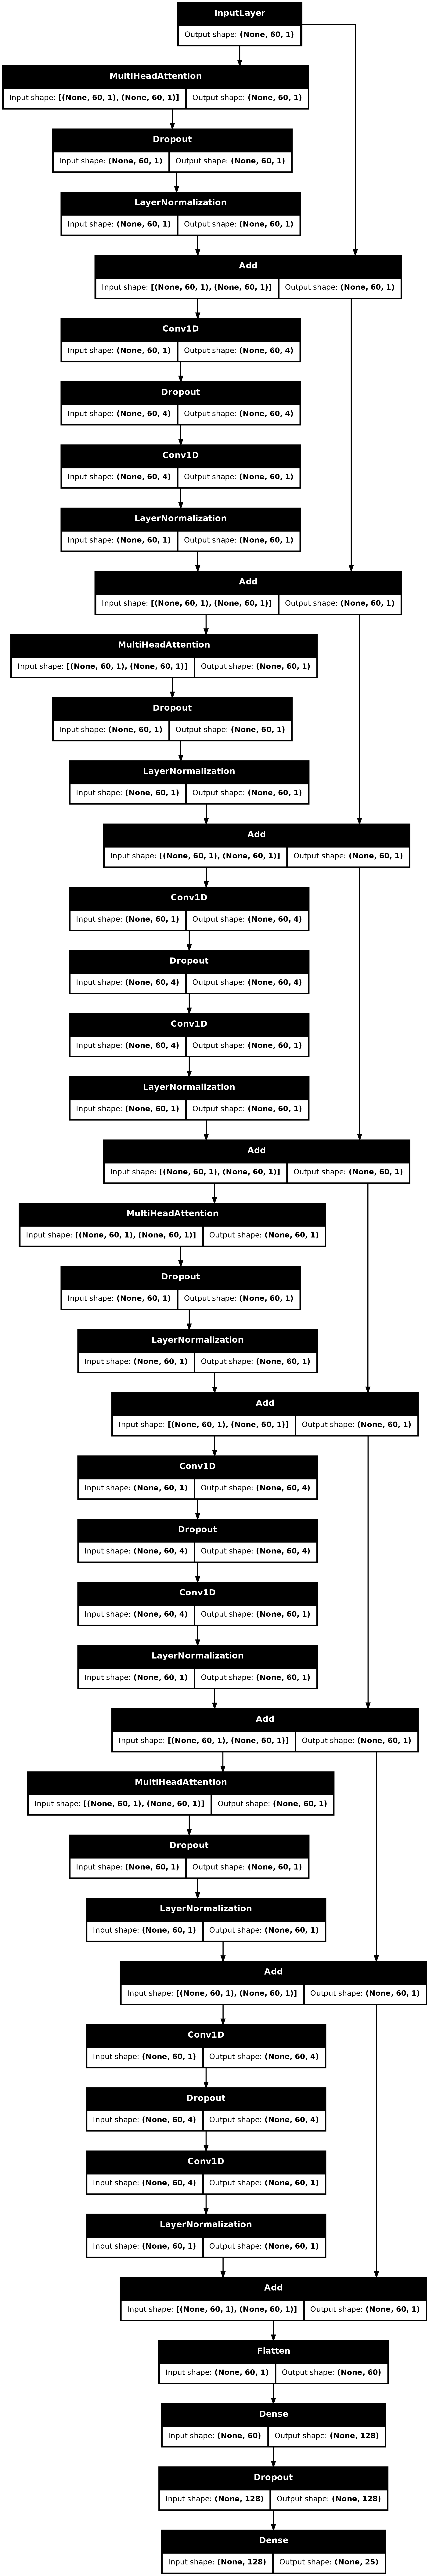

In [220]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [229]:
X_test.reshape(-1,60)

array([[ 3.52156982e+01,  3.11006314e-02, -8.76727184e+00, ...,
        -6.06348116e-01,  1.04146418e-01, -3.65525560e-01],
       [ 3.44375000e+01,  0.00000000e+00, -9.20533281e+00, ...,
         1.91238745e-01,  8.32457946e-01,  3.69178869e-01],
       [ 3.26250000e+01,  0.00000000e+00, -5.42092947e+00, ...,
        -3.11424162e-01, -5.93576729e-01,  1.45003544e-01],
       ...,
       [ 3.38476562e+01,  3.10048982e-02,  6.48839457e+00, ...,
         1.38206270e-02,  9.06283946e-02,  5.95671761e-03],
       [ 3.01906738e+01,  1.37219194e-02, -9.54634255e+00, ...,
        -7.01586182e-01, -6.29106581e-01,  3.62436038e-01],
       [ 3.31822510e+01,  1.73352738e-02, -8.09518551e+00, ...,
        -4.75512064e-01, -3.91438660e-01, -2.30069055e-01]])

In [232]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_test_reshaped.shape

(2355, 60)

In [233]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=callbacks,
)
model.evaluate(X_test_reshaped, y_test )

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9158 - loss: 0.3212 - val_accuracy: 0.9575 - val_loss: 0.1823
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9213 - loss: 0.2971 - val_accuracy: 0.9586 - val_loss: 0.1773
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9282 - loss: 0.2935 - val_accuracy: 0.9581 - val_loss: 0.1723
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9205 - loss: 0.2927 - val_accuracy: 0.9586 - val_loss: 0.1671
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9207 - loss: 0.2883 - val_accuracy: 0.9591 - val_loss: 0.1626
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9284 - loss: 0.2701 - val_accuracy: 0.9597 - val_loss: 0.1595
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9326 - loss: 0.2623 - val_accuracy: 0.9597 - val_loss: 0.1550
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9312 - loss: 0.2630 - val_accuracy: 0.

[0.1586180329322815, 0.9617834687232971]

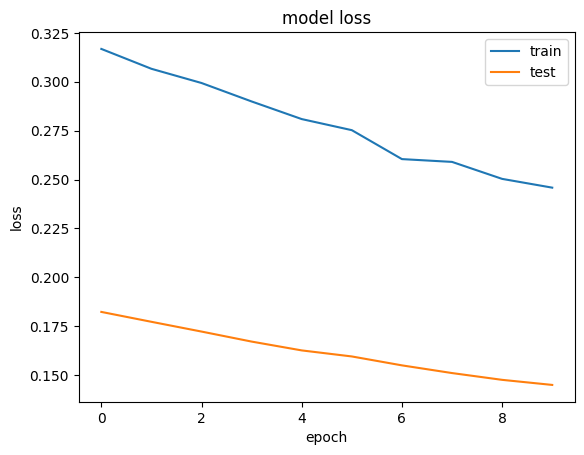

In [234]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

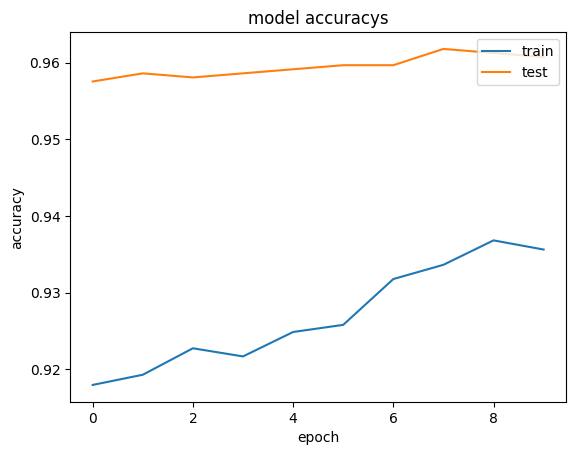

In [235]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracys')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       241
           2       0.88      0.88      0.88       232
           3       0.90      0.89      0.90       244
           4       1.00      0.99      1.00       305
           5       1.00      1.00      1.00       119
           6       0.99      0.99      0.99       207
           7       0.99      1.00      1.00       239
          12       0.98      0.98      0.98       104
          13       1.00      0.99      0.99        86
          16       0.98      0.95      0.96       220
          17       0.92      0.94      0.93       308
          24       1.00      1.00      1.00        50

    accuracy                           0.96      2355
   macro avg       0.97      0.97      0.97      2355
weighted avg       0.96      0.96      0.96      2355



(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

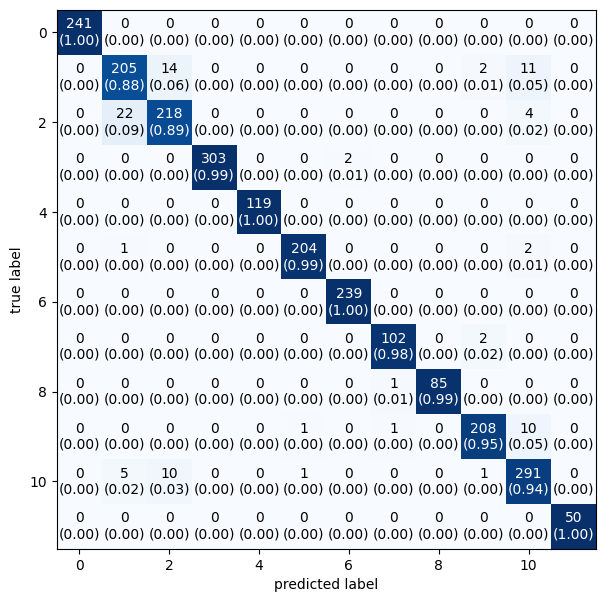

In [246]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

# 다중 클래스 레이블로 변환
y_test_single_label = np.argmax(y_test, axis=1)

# 혼동 행렬 계산
mat = confusion_matrix(y_test_single_label, y_pred_class)

# 분류 보고서 출력
print(classification_report(y_test_single_label, y_pred_class))

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7, 7))


In [249]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(accuracy_score(y_test_single_label, y_pred_class))


0.9617834394904459
